In [1]:
#Churn Prediction

*Problem*

Can you predict whether a customer will churn or not?

*Problem Statement:*

Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones.

In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.

*Objective:*

Our objective is to build a machine learning model to predict whether the customer will churn or not in the next six months.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [3]:
train = pd.read_csv('../input/jobathon-march-2022/train_PDjVQMB.csv')
test = pd.read_csv('../input/jobathon-march-2022/test_lTY72QC.csv')

In [4]:
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [5]:
train.shape,test.shape

((6650, 11), (2851, 10))

We have 6650 rows and 11 columns in Train set whereas Test set has 2851 rows and 11 columns.

In [6]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                    0.0
Age                   0.0
Gender                0.0
Income                0.0
Balance               0.0
Vintage               0.0
Transaction_Status    0.0
Product_Holdings      0.0
Credit_Card           0.0
Credit_Category       0.0
Is_Churn              0.0
dtype: float64

In [7]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                    0.0
Age                   0.0
Gender                0.0
Income                0.0
Balance               0.0
Vintage               0.0
Transaction_Status    0.0
Product_Holdings      0.0
Credit_Card           0.0
Credit_Category       0.0
dtype: float64

In [8]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 5
Numerical Features in Train Set: 6


In [9]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 5
Numerical Features in Train Set: 5


In [10]:
#Step 3: Data Cleaning¶

In [11]:
train.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [12]:
test.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

In [13]:
train['Gender'].value_counts()

Male      3612
Female    3038
Name: Gender, dtype: int64

In [14]:
train['Gender'].replace(['Male ','Female'],['Male ','Female'],inplace = True)
test['Gender'].replace(['Male ','Female'],['Male ','Female'],inplace = True)

In [15]:
train['Gender']= train['Gender'].astype(str)

<AxesSubplot:xlabel='Gender', ylabel='count'>

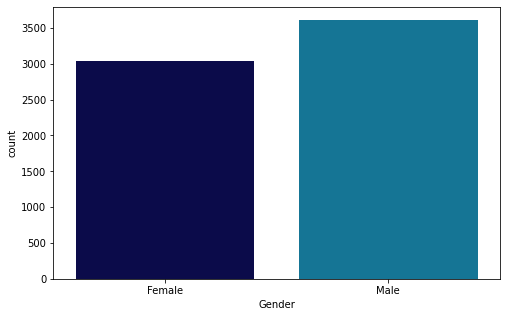

In [16]:
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=train,palette='ocean')

In [17]:
train

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


In [18]:
train.groupby('Gender').Is_Churn.mean()

Gender
Female    0.25576
Male      0.21041
Name: Is_Churn, dtype: float64

In [19]:
# Separating Numerical and Categorical Columns

numerical_features =train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features=train.select_dtypes(include=['object','category']).columns.tolist()

In [20]:
categorical_features.remove('ID')

In [21]:
print(numerical_features)
print(categorical_features)

['Age', 'Balance', 'Vintage', 'Transaction_Status', 'Credit_Card', 'Is_Churn']
['Gender', 'Income', 'Product_Holdings', 'Credit_Category']


<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

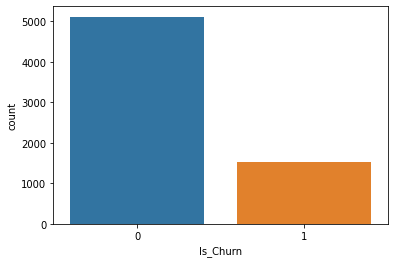

In [22]:
# Count Plot for Categorical Variable
sns.countplot(x='Is_Churn',data=train)

# Customer Churn's with Percentage of 23.11 and not Churn's with Percentage of 76.89

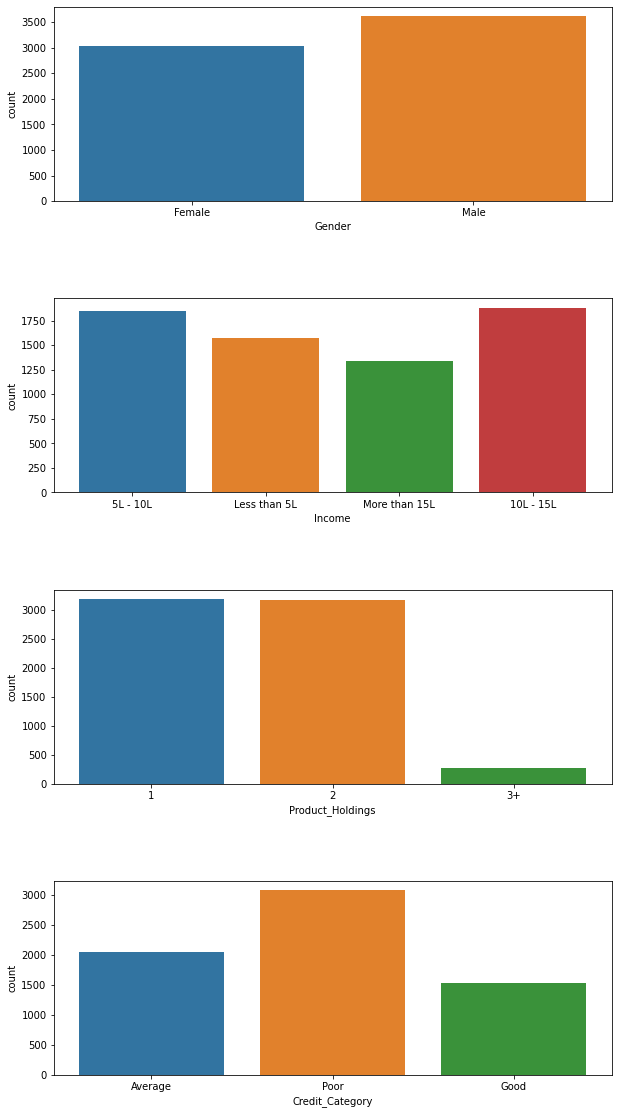

In [23]:
# Plotting Countplot for Categorical Features
fig = plt.figure(figsize=(10,25))
for index,var in enumerate(categorical_features): #Enumarte returns values as well as the index of the value
    if var!="ID":
        plt.subplot(5,1,index+1) 
        plt.subplots_adjust(hspace=0.5)
        plt.xticks(rotation=0)
        sns.countplot(x = var, data=train)
        plt.plot()

# More Male Customer as compared to Female Customer

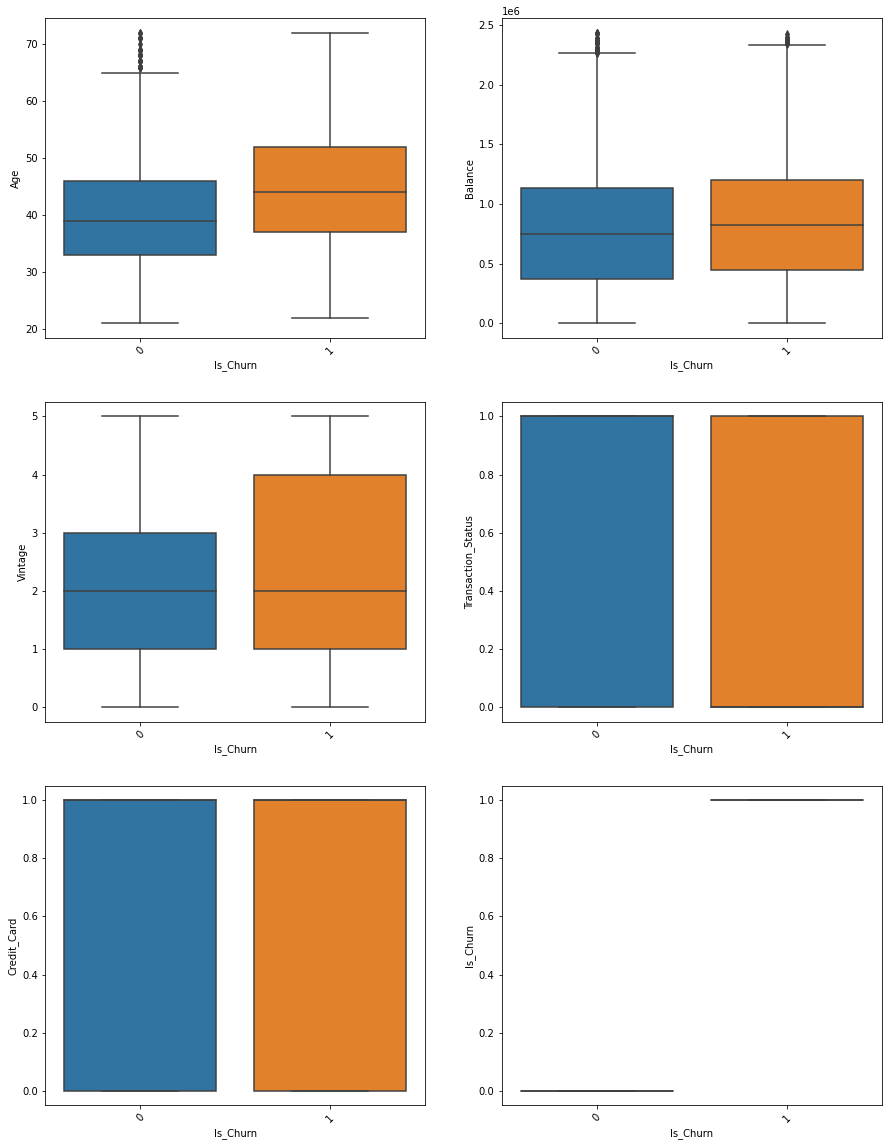

In [24]:
# Plots between Target Categorical and Numerical Variable
fig = plt.figure(figsize=(15,20))
for index,var in enumerate(numerical_features):
    plt.subplot(3,2,index+1) 
    plt.xticks(rotation=45)
    sns.boxplot(x="Is_Churn",y = var, data=train)
    plt.plot()

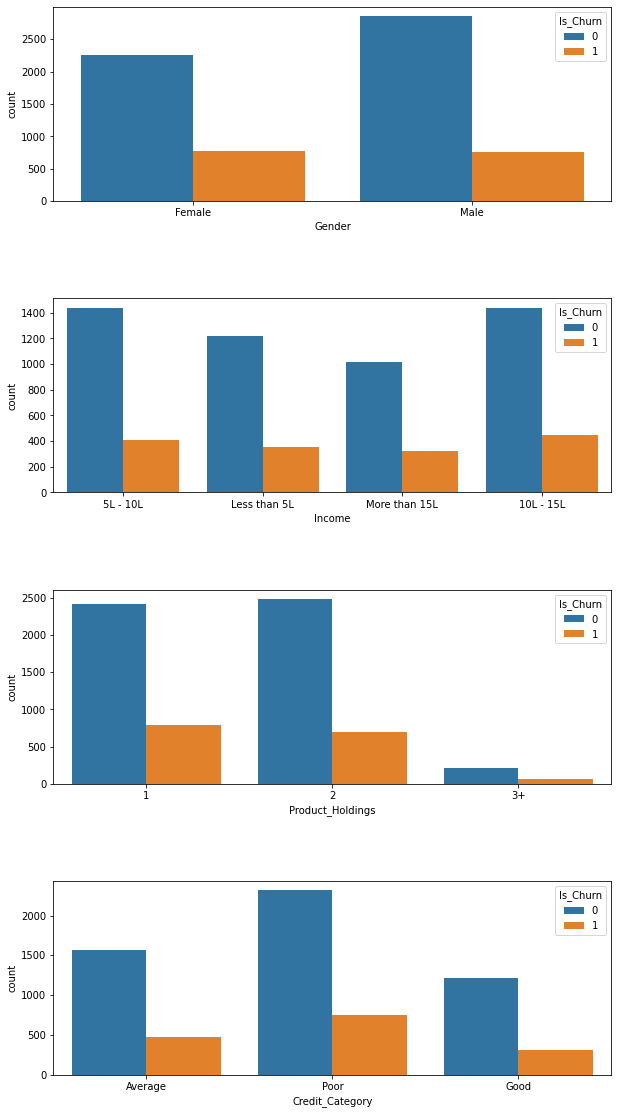

In [25]:
# BarPlot for Categorical Column with respect to Churn Columns
plt.figure(figsize=(10,25))
for index,cat_feat in enumerate(categorical_features):
    if ((cat_feat !="ID") & (cat_feat != "Is_Churn")):
        plt.subplot(5,1,index+1)
        plt.subplots_adjust(hspace=0.5)
        plt.xticks(rotation=0)
        sns.countplot(x = cat_feat,hue = "Is_Churn", data=train)

In [26]:
#Feature Engineering

In [27]:
# Copying Data to new DataFrame by dropping ID Column because its not required for Feature Engineering

df_copy=train.drop('ID',axis = 1)
df_copy.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [28]:
df_copy.Is_Churn.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [29]:
# From above there is Imbalance Classes Class : '0' is Majority Class and Class : '1' is Minority Class.
# So to Overcome from this Situation we have to done Sampling.
# So here is Two Sampling : Under Sampling and Over Sampling
# Here Over Sampling is good fit because if UnderSampling is done to the dataset will be low and the Prediction will good enough
# So OverSampling is done to Overcome the Class Imbalance Situation

from sklearn.utils import resample
df_majority = df_copy.loc[df_copy.Is_Churn == 0].copy()
df_minority = df_copy.loc[df_copy.Is_Churn == 1].copy()

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                             replace=True,  # sample with replacement
                             n_samples=4500,  # to match majority class
                             random_state=123)  # reproducible results

# Combine majority class with upsampled minority class
df_copy = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_copy.Is_Churn.value_counts())

0    5113
1    4500
Name: Is_Churn, dtype: int64


In [30]:
# So now check the the new Class Counts 

df_copy.Is_Churn.value_counts()

0    5113
1    4500
Name: Is_Churn, dtype: int64

In [31]:
# So in the DataSet there is Categorical and Numerical Column
# For Categorical Columns we apply LabelEncoder to encode them
# for Categorical Columns with Two Class using LabelEncoder and for More than two Using OrdinalEncoder


# Import Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns
for column in df_copy.columns:
    if df_copy[column].dtype == object and column != 'ID':
        if df_copy[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df_copy[column] = le.fit_transform(df_copy[column]) 
        else:
            dummy_columns.append(column)
#apply get dummies for selected columns
#df_copy = pd.get_dummies(data = df_copy,columns = dummy_columns)

In [32]:
# Import OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(df_copy[dummy_columns])
df_copy[dummy_columns] = pd.DataFrame(data_encoded, columns=dummy_columns)
df_copy

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
1,53,0,3.0,875572.11,2,1,1.0,1,2.0,0
2,35,0,2.0,701607.06,2,1,0.0,0,1.0,0
5,31,0,0.0,111026.79,4,1,1.0,0,2.0,0
6,56,1,0.0,1072102.23,2,1,0.0,1,0.0,0
9,32,0,1.0,770796.81,3,0,1.0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...
2046,51,1,2.0,1082493.99,4,1,0.0,1,2.0,1
1299,24,1,3.0,107604.00,2,1,1.0,1,1.0,1
662,61,0,2.0,745776.72,0,0,0.0,1,1.0,1
79,48,0,2.0,307604.07,0,1,0.0,0,2.0,1


In [33]:
# Now the Dataset is Encoded 
df_copy.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
1,53,0,3.0,875572.11,2,1,1.0,1,2.0,0
2,35,0,2.0,701607.06,2,1,0.0,0,1.0,0
5,31,0,0.0,111026.79,4,1,1.0,0,2.0,0
6,56,1,0.0,1072102.23,2,1,0.0,1,0.0,0
9,32,0,1.0,770796.81,3,0,1.0,1,2.0,0


In [34]:
features = df_copy.columns.tolist()
features.remove('Is_Churn')
features

['Age',
 'Gender',
 'Income',
 'Balance',
 'Vintage',
 'Transaction_Status',
 'Product_Holdings',
 'Credit_Card',
 'Credit_Category']

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_copy.values, i) for i in range(len(features))]
vif["Features"] = features
vif


# So here Checking for MutliCollinearity 
# here VIF value > 5 has high MultiCollinearity which is Age Column
# So to Solve this Problem we Standarise or done Normalization.

,VIF,Features
0,9.827571,Age
1,2.030183,Gender
2,2.422756,Income
3,3.274118,Balance
4,3.171564,Vintage
5,1.934420,Transaction_Status
6,1.911552,Product_Holdings
7,2.848908,Credit_Card
8,2.660424,Credit_Category


In [36]:
# So applying MinMaxScaler to Age to deal with MultiCollinearity
# Also applying for Balance Column because it contains Outlier as we seen in Data Visualization(BoxPlot) 

# Import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
col_names = ['Age','Balance']
features1 = df_copy[col_names]
scaler =  MinMaxScaler().fit(features1.values)
features1 = scaler.transform(features1.values)
df_copy[col_names] = features1
df_copy.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
1,0.627451,0,3.0,0.359323,2,1,1.0,1,2.0,0
2,0.274510,0,2.0,0.287925,2,1,0.0,0,1.0,0
5,0.196078,0,0.0,0.045541,4,1,1.0,0,2.0,0
6,0.686275,1,0.0,0.439982,2,1,0.0,1,0.0,0
9,0.215686,0,1.0,0.316321,3,0,1.0,1,2.0,0


In [37]:
# Now the MultiCollinearity is Low or removed now we can move for further process

from statsmodels.stats.outliers_influence import variance_inflation_factor

SB = pd.DataFrame()
SB["VIF"] = [variance_inflation_factor(df_copy.values, i) for i in range(len(features))]
SB["Features"] = features
SB

,VIF,Features
0,4.825362,Age
1,1.974470,Gender
2,2.350580,Income
3,3.082354,Balance
4,2.990486,Vintage
5,1.872448,Transaction_Status
6,1.872067,Product_Holdings
7,2.714081,Credit_Card
8,2.542842,Credit_Category


<AxesSubplot:>

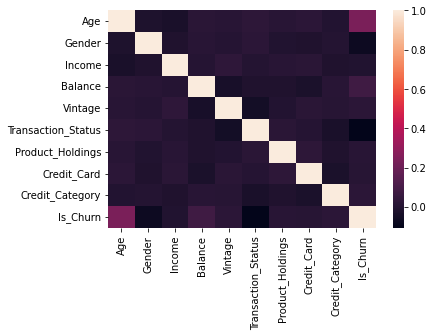

In [38]:
# Checking Correlation between Columns

corr = df_copy.corr()

# Correlation HeatMap

import seaborn as sns
sns.heatmap(corr)

In [39]:
# This Loop will delete that columns which are highly Correlated

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_copy.columns[columns]
df_copy = df_copy[selected_columns]

In [40]:
# display data
df_copy.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
1,0.627451,0,3.0,0.359323,2,1,1.0,1,2.0,0
2,0.274510,0,2.0,0.287925,2,1,0.0,0,1.0,0
5,0.196078,0,0.0,0.045541,4,1,1.0,0,2.0,0
6,0.686275,1,0.0,0.439982,2,1,0.0,1,0.0,0
9,0.215686,0,1.0,0.316321,3,0,1.0,1,2.0,0


In [41]:
#Data Modelling

In [42]:
df = pd.DataFrame()
df['Is_Churn'] = df_copy['Is_Churn']

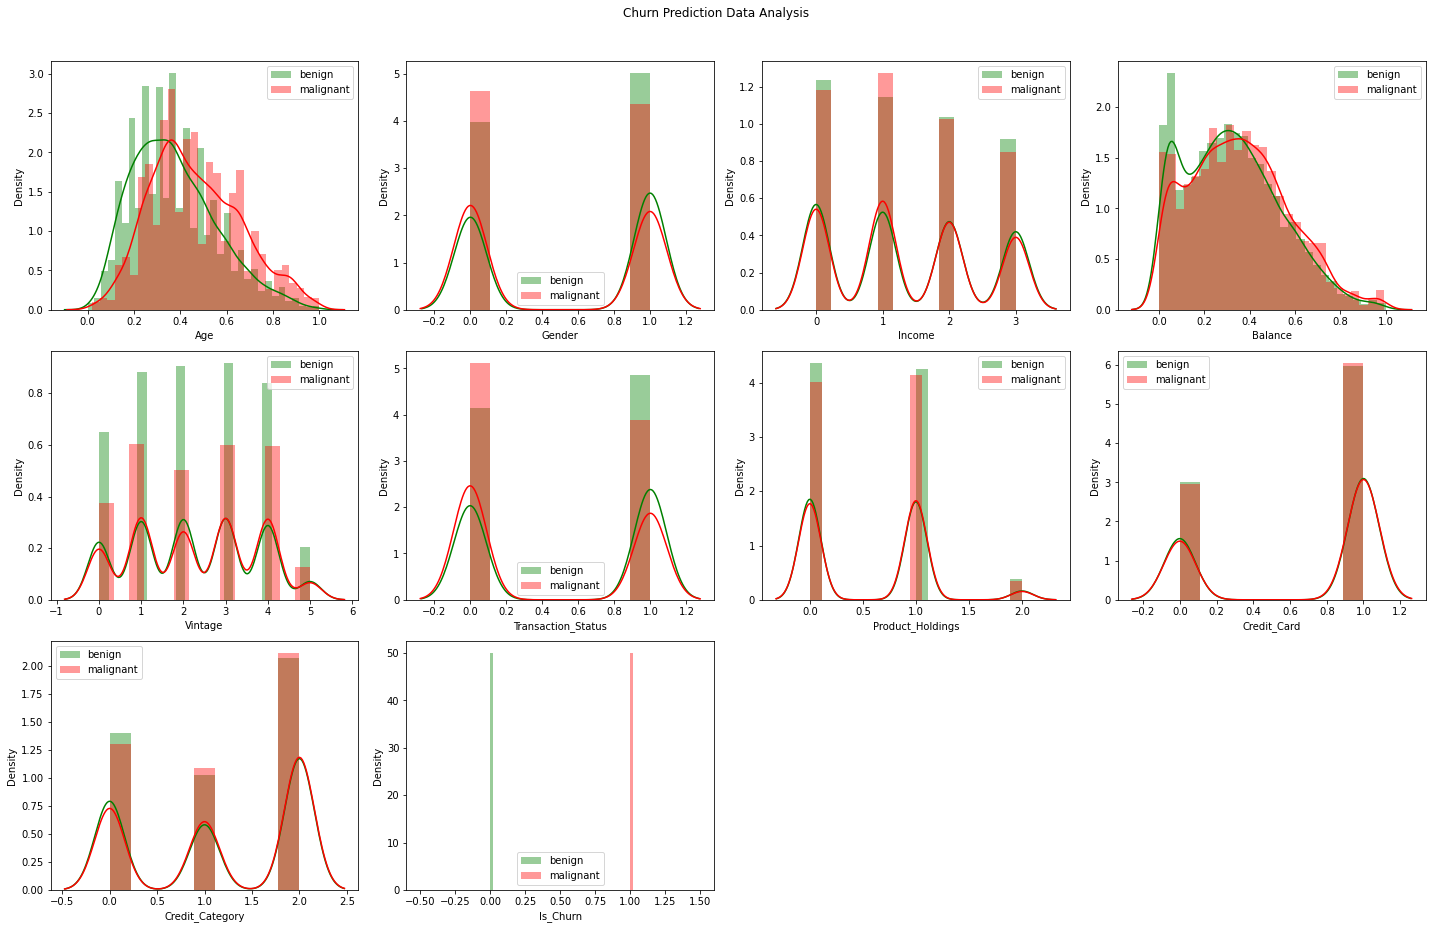

In [43]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df_copy.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df_copy[i][df['Is_Churn']==0], color='g', label = 'benign')
    sns.distplot(df_copy[i][df['Is_Churn']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Churn Prediction Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [44]:
# Storing the Data into X , y for modelling part
X = df_copy.drop(['Is_Churn'], axis=1)
y = df_copy['Is_Churn']

In [45]:
# Here applying Statistical Analysis by using Generalised Linear Model Regression or Ordinary least-squares to Check the 
# relationship between the dependent and independent Variables
# So the Columns which has Value Greater than P-Value than Significance Value (0.05) are not Signicant for the target or less 
# Contribute for Target Variable 

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as ms
from scipy import stats


X2 = ms.add_constant(X)
est = ms.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Is_Churn   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     90.22
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          4.85e-162
Time:                        07:45:29   Log-Likelihood:                -6567.3
No. Observations:                9613   AIC:                         1.315e+04
Df Residuals:                    9603   BIC:                         1.323e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2210      0

In [46]:
np.exp(est2.params)

const                 1.247315
Age                   1.834364
Gender                0.935416
Income                0.998908
Balance               1.178550
Vintage               1.004791
Transaction_Status    0.896044
Product_Holdings      1.008003
Credit_Card           1.005509
Credit_Category       1.008818
dtype: float64

In [47]:
# Final Data Modelling

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold

#train and test split with 90% training dataset and 10% test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)

In [49]:
# Using GridSearchCV for best HyperParameters Tuning and Fitting the best Model
# Using StratifiedKFolf for Cross Validation

nb_classifier = GaussianNB()
cv_method = StratifiedKFold()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
classifier = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='f1') 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
classifier.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.0005336699231206307}

In [50]:
# Classification Matrix and Accuracy of the Model

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       506
           1       0.67      0.50      0.57       456

    accuracy                           0.65       962
   macro avg       0.65      0.64      0.64       962
weighted avg       0.65      0.65      0.64       962

0.6476091476091476


In [51]:
# According to the Problem Statement the Evaluation Metrics is F1 macro score 

from sklearn.metrics import f1_score

print('F1_SCORE: ',f1_score(y_test, predictions,average='macro'))

F1_SCORE:  0.6366595918913047


In [52]:
# Accuracy of the Model

from sklearn.metrics import accuracy_score

print('Accuracy: ',accuracy_score(y_test, predictions))

Accuracy:  0.6476091476091476


In [53]:
#Testing Model on Test Dataset

In [54]:
# Storing to new DataFrame without 'ID' Column because it dont require 

test_copy = test.drop('ID',axis = 1)

In [55]:
# Label Encoder on Test DataSet
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns
for column in test_copy.columns:
    if test_copy[column].dtype == object and column != 'ID':
        if test_copy[column].nunique() == 2:
            #apply Label Encoder for binary ones
            test_copy[column] = le.fit_transform(test_copy[column]) 
        else:
            dummy_columns.append(column)
#apply get dummies for selected columns
#test_copy = pd.get_dummies(data = test_copy,columns = dummy_columns)

In [56]:
# Ordinal Encoder on test Dataset

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(test_copy[dummy_columns])
test_copy[dummy_columns] = pd.DataFrame(data_encoded, columns=dummy_columns)
test_copy

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,50,0,3.0,1008636.39,2,1,1.0,1,0.0
1,36,1,1.0,341460.72,2,0,1.0,1,0.0
2,25,0,0.0,439460.10,0,0,1.0,1,1.0
3,41,1,2.0,28581.93,0,1,1.0,1,2.0
4,48,1,3.0,1104540.03,2,1,2.0,0,1.0
...,...,...,...,...,...,...,...,...,...
2846,40,0,0.0,1338458.22,0,0,0.0,1,2.0
2847,48,0,3.0,1448280.27,0,1,1.0,1,0.0
2848,59,1,3.0,1100555.64,3,0,0.0,1,2.0
2849,34,0,1.0,1502818.92,2,0,0.0,1,2.0


In [57]:
# Normalize Columns using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
col_names = ['Age','Balance']
features = test_copy[col_names]
scaler =  MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
test_copy[col_names] = features
test_copy.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,0.568627,0,3.0,0.413891,2,1,1.0,1,0.0
1,0.294118,1,1.0,0.139709,2,0,1.0,1,0.0
2,0.078431,0,0.0,0.179983,0,0,1.0,1,1.0
3,0.392157,1,2.0,0.011128,0,1,1.0,1,2.0
4,0.529412,1,3.0,0.453303,2,1,2.0,0,1.0


In [58]:
test_copy.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,0.568627,0,3.0,0.413891,2,1,1.0,1,0.0
1,0.294118,1,1.0,0.139709,2,0,1.0,1,0.0
2,0.078431,0,0.0,0.179983,0,0,1.0,1,1.0
3,0.392157,1,2.0,0.011128,0,1,1.0,1,2.0
4,0.529412,1,3.0,0.453303,2,1,2.0,0,1.0


In [59]:
# Making Predictions on Test Data

predictions = classifier.predict(test_copy)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [1 0 0 ... 1 1 1]
Actual labels:     4256    0
125     1
4597    1
3114    0
1844    1
       ..
1767    0
1749    1
6541    1
1268    1
3081    1
Name: Is_Churn, Length: 962, dtype: int64


In [60]:
# Storing to Submission DataFrame
ID = test['ID']
submission = pd.DataFrame({
                  "ID": ID, 
                  "Is_Churn": predictions})

In [61]:
submission.head()

,ID,Is_Churn
0,55480787,1
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0


In [62]:
# Storing into Prediction into CSV file

submission.to_csv('Final_Submission_NB.csv', index=False)